Read the comments.csv to pandas dataframe.

In [1]:
import pandas as pd

df = pd.read_csv('../data/comments_labeled.csv', header=0)
df = df[df['text'].str.len() > 100]
len(df)

29885

First we use CountVectorizer to convert the text.

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer(input='content', stop_words='english')
dtm_cv = cv.fit_transform(df['text'])
print(len(cv.get_feature_names()))

35424


We train KMeans model with n_cluster=2:8.

In [3]:
import time
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

models = []
for i in range(2, 9):
    t = time.time()
    model = KMeans(n_clusters=i, random_state=501)
    model.fit(dtm_cv)
    models.append((i, model))
    print(f'Fitted KMeans({i}), time elapsed: {time.time() - t:.2f}s.')

Fitted KMeans(2), time elapsed: 0.29s.
Fitted KMeans(3), time elapsed: 0.36s.
Fitted KMeans(4), time elapsed: 1.96s.
Fitted KMeans(5), time elapsed: 1.32s.
Fitted KMeans(6), time elapsed: 0.90s.
Fitted KMeans(7), time elapsed: 6.00s.
Fitted KMeans(8), time elapsed: 6.57s.


Plot the sum of square distances for each model.

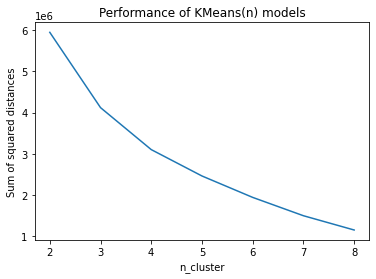

In [4]:
from matplotlib import pyplot as plt

plt.plot([m[0] for m in models], [m[1].inertia_ for m in models])
plt.xlabel('n_cluster')
plt.ylabel('Sum of squared distances')
plt.title('Performance of KMeans(n) models')
plt.show()

Print Top20 words in each cluster.

In [5]:
m = models[-1][1]
for i in range(m.n_clusters):
    center = m.cluster_centers_[i].argsort()[::-1]
    top20 = [cv.get_feature_names()[idx] for idx in center[:20]]
    print('\t', f'Cluster{i}: ', ','.join(top20))

	 Cluster0:  just,like,amd,people,don,new,intel,nvidia,make,good,time,know,really,linus,video,want,apple,use,think,buy
	 Cluster1:  usa,zzzzzzzzzzzzzzzzzzzzzzzzzzzz,enuf,enviorment,envelope,enus726us726,enunciations,enunciate,enuff,entwicklung,entry,entrr,entries,entrepreneur,entrenched,entrants,envious,enviroment,eop,eny
	 Cluster2:  poop,zzzzzzzzzzzzzzzzzzzzzzzzzzzz,enuff,enviorment,envelope,enus726us726,enunciations,enunciate,enuf,entrance,entwicklung,entry,entrr,entries,entrepreneur,entrenched,envious,enviroment,environment,environmental
	 Cluster3:  fix,360p,sorry,enuf,envelope,enus726us726,enunciations,enunciate,enuff,entwicklung,envious,entry,entrr,entries,entrepreneur,entrenched,enviorment,enviroment,entrance,environment
	 Cluster4:  46,zzzzzzzzzzzzzzzzzzzzzzzzzzzz,enuf,enviorment,envelope,enus726us726,enunciations,enunciate,enuff,entwicklung,enviroment,entry,entrr,entries,entrepreneur,entrenched,envious,environment,entrance,enya
	 Cluster5:  wiggle,did,zzzzzzzzzzzzzzzzzzzzzzzz

Then we use CountVectorizer(max_df=0.5, max_feature=1000) to convert the text.

In [6]:
cv_1k = TfidfVectorizer(input='content', use_idf=False, max_df=0.5, max_features=1000, stop_words='english')
dtm_cv_1k = cv_1k.fit_transform(df['text'])
print(cv_1k.get_feature_names()[100:150])

['bad', 'ban', 'banned', 'barely', 'based', 'basically', 'battery', 'beard', 'beat', 'believe', 'best', 'bet', 'better', 'big', 'bigger', 'biggest', 'billion', 'binod', 'bios', 'bit', 'bitcoin', 'bits', 'black', 'block', 'blue', 'board', 'boards', 'bought', 'box', 'boy', 'brain', 'brand', 'break', 'bring', 'browser', 'bs', 'btw', 'bucks', 'budget', 'build', 'building', 'built', 'bullshit', 'bunch', 'business', 'button', 'buy', 'buying', 'cable', 'called']


We train KMeans model with n_cluster=2:8 using dtm_cv_1k again.

In [7]:
models_1k = []
for i in range(2, 9):
    t = time.time()
    model = KMeans(n_clusters=i, random_state=501)
    model.fit(dtm_cv_1k)
    models_1k.append((i, model))
    print(f'Fitted KMeans({i}), time elapsed: {time.time() - t:.2f}s.')

Fitted KMeans(2), time elapsed: 13.18s.
Fitted KMeans(3), time elapsed: 20.48s.
Fitted KMeans(4), time elapsed: 29.30s.
Fitted KMeans(5), time elapsed: 38.25s.
Fitted KMeans(6), time elapsed: 37.29s.
Fitted KMeans(7), time elapsed: 42.73s.
Fitted KMeans(8), time elapsed: 56.77s.


Plot the sum of square distances for each model.

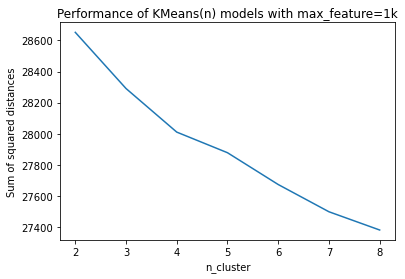

In [8]:
from matplotlib import pyplot as plt

plt.plot([m[0] for m in models_1k], [m[1].inertia_ for m in models_1k])
plt.xlabel('n_cluster')
plt.ylabel('Sum of squared distances')
plt.title('Performance of KMeans(n) models with max_feature=1k')
plt.show()

Print Top20 words in each cluster.

In [9]:
m = models_1k[-1][1]
for i in range(m.n_clusters):
    center = m.cluster_centers_[i].argsort()[::-1]
    top20 = [cv_1k.get_feature_names()[idx] for idx in center[:20]]
    print('\t', f'Cluster{i}: ', ','.join(top20))

	 Cluster0:  good,new,time,make,really,nvidia,know,use,actually,riley,news,game,going,tech,buy,games,better,think,thing,pc
	 Cluster1:  people,don,know,think,want,use,make,buy,need,really,just,new,time,good,actually,going,like,money,way,game
	 Cluster2:  linus,like,just,riley,tech,know,time,good,love,new,don,techlinked,channel,did,really,great,make,think,videos,madison
	 Cluster3:  video,just,like,linus,watch,time,youtube,make,good,riley,really,did,don,news,great,know,guys,love,tech,videos
	 Cluster4:  just,new,don,make,really,people,want,know,nvidia,time,good,buy,way,think,game,use,better,thing,going,need
	 Cluster5:  like,just,don,really,good,new,make,people,time,news,know,riley,looks,tech,feel,games,look,want,nvidia,game
	 Cluster6:  apple,just,like,arm,make,epic,don,people,google,iphone,new,phone,use,want,app,store,really,going,money,company
	 Cluster7:  amd,intel,nvidia,cpu,new,gpu,ryzen,better,just,good,performance,time,cpus,years,like,buy,going,make,cards,really


Use TruncatedSVD to decompose dtm to 2-dimensional and then visualize the clusters.

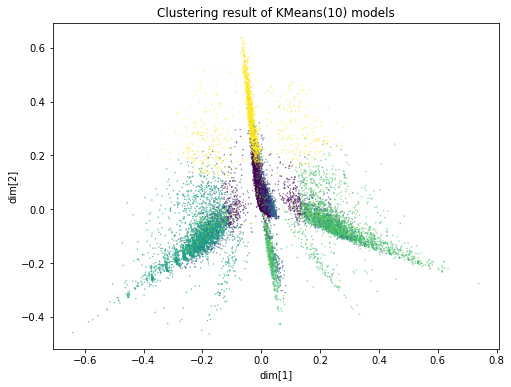

In [10]:
from sklearn.decomposition import TruncatedSVD

decomp = TruncatedSVD(n_components=3, random_state=501)
dtm_tfv_1k_2d = decomp.fit_transform(dtm_cv_1k)
plt.figure(figsize=(8,6))
plt.scatter(dtm_tfv_1k_2d[:, 1], dtm_tfv_1k_2d[:, 2], s=0.11, c=models_1k[-1][1].labels_)
plt.xlabel('dim[1]')
plt.ylabel('dim[2]')
plt.title('Clustering result of KMeans(10) models')
plt.show()

The clustering results look good. We try the TfidfVectorizer instead of CountVectorizer.

In [11]:
tfv_1k = TfidfVectorizer(input='content', max_df=0.5, max_features=1000, stop_words='english')
dtm_tfv_1k = tfv_1k.fit_transform(df['text'])
print(tfv_1k.get_feature_names()[100:150])

['bad', 'ban', 'banned', 'barely', 'based', 'basically', 'battery', 'beard', 'beat', 'believe', 'best', 'bet', 'better', 'big', 'bigger', 'biggest', 'billion', 'binod', 'bios', 'bit', 'bitcoin', 'bits', 'black', 'block', 'blue', 'board', 'boards', 'bought', 'box', 'boy', 'brain', 'brand', 'break', 'bring', 'browser', 'bs', 'btw', 'bucks', 'budget', 'build', 'building', 'built', 'bullshit', 'bunch', 'business', 'button', 'buy', 'buying', 'cable', 'called']


We train KMeans model with n_cluster=2:8 using dtm_cv_1k again.

In [12]:
models_tf_1k = []
for i in range(2, 9):
    t = time.time()
    model = KMeans(n_clusters=i, n_init=1, max_iter=20, random_state=501)
    model.fit(dtm_tfv_1k)
    models_tf_1k.append((i, model))
    print(f'Fitted KMeans({i}) with tf-idf, time elapsed: {time.time() - t:.2f}s.')

Fitted KMeans(2) with tf-idf, time elapsed: 2.45s.
Fitted KMeans(3) with tf-idf, time elapsed: 3.88s.
Fitted KMeans(4) with tf-idf, time elapsed: 3.97s.
Fitted KMeans(5) with tf-idf, time elapsed: 5.00s.
Fitted KMeans(6) with tf-idf, time elapsed: 6.12s.
Fitted KMeans(7) with tf-idf, time elapsed: 7.74s.
Fitted KMeans(8) with tf-idf, time elapsed: 7.87s.


Plot the sum of square distances for each model.

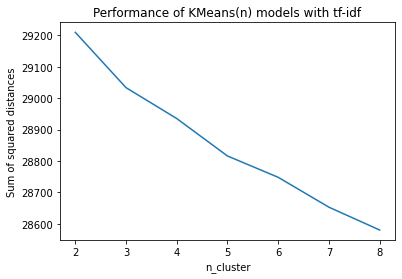

In [13]:
from matplotlib import pyplot as plt

plt.plot([m[0] for m in models_tf_1k], [m[1].inertia_ for m in models_tf_1k])
plt.xlabel('n_cluster')
plt.ylabel('Sum of squared distances')
plt.title('Performance of KMeans(n) models with tf-idf')
plt.show()

Also we can visualize the clustering results using decomposition methods.

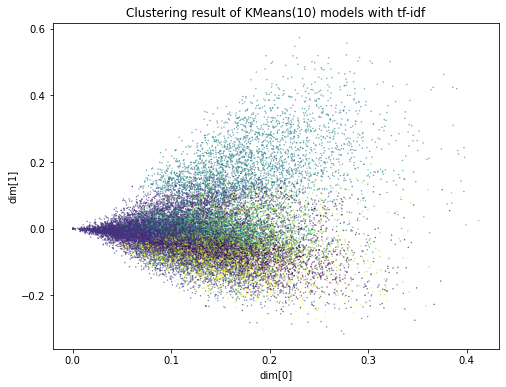

In [14]:
decomp = TruncatedSVD(n_components=3, random_state=501)
dtm_tfv_1k_2d = decomp.fit_transform(dtm_tfv_1k)
plt.figure(figsize=(8,6))
plt.scatter(dtm_tfv_1k_2d[:, 0], dtm_tfv_1k_2d[:, 1], s=0.11, c=models_tf_1k[-1][1].labels_)
plt.xlabel('dim[0]')
plt.ylabel('dim[1]')
plt.title('Clustering result of KMeans(10) models with tf-idf')
plt.show()

Print Top20 words in each cluster.

In [15]:
m = models_tf_1k[-1][1]
for i in range(m.n_clusters):
    center = m.cluster_centers_[i].argsort()[::-1]
    top20 = [tfv_1k.get_feature_names()[idx] for idx in center[:20]]
    print('\t', f'Cluster{i}: ', ','.join(top20))

	 Cluster0:  like,just,don,people,really,looks,feel,riley,good,look,sounds,make,time,new,know,apple,video,thing,actually,way
	 Cluster1:  people,don,apple,know,time,good,new,make,really,use,nvidia,actually,think,google,riley,going,want,need,phone,way
	 Cluster2:  linus,like,riley,video,just,know,love,tech,time,madison,channel,techlinked,did,great,good,videos,don,guy,tips,wars
	 Cluster3:  amd,intel,nvidia,cpu,gpu,ryzen,new,cpus,better,just,performance,years,good,time,market,like,buy,gen,cards,going
	 Cluster4:  games,game,pc,xbox,play,console,steam,gaming,just,8k,buy,like,don,new,4k,want,people,run,fps,good
	 Cluster5:  price,windows,just,10,performance,buy,nvidia,linux,new,cards,microsoft,gpu,card,like,11,people,better,amd,don,want
	 Cluster6:  just,video,don,make,people,know,really,new,time,want,good,riley,way,apple,did,love,think,watch,going,thing
	 Cluster7:  news,tech,riley,like,just,guys,facebook,techlinked,channel,video,don,watch,really,love,good,make,fake,time,jokes,want


Most comments are in cluster 0, But the result seems better than CountVectorizer. Let's try some other models.

Before we use DBScan model, it's better to use a small subset and estimate the eps first.

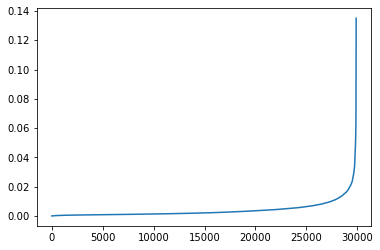

In [16]:
import numpy as np
from sklearn.neighbors import NearestNeighbors


decomp = TruncatedSVD(n_components=3, random_state=501)
dtm_db_3d = decomp.fit_transform(dtm_cv_1k)

nn = NearestNeighbors(n_neighbors=2)
nn.fit(dtm_db_3d)
distances, indices = nn.kneighbors(dtm_db_3d)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [17]:
t = time.time()
db = DBSCAN(eps=0.008, min_samples=10, metric='euclidean', n_jobs=-1)
db.fit(dtm_db_3d[:, 1:2])
print(f'Fitted DBScan with tf-idf, time elapsed: {time.time() - t:.2f}s.')

Fitted DBScan with tf-idf, time elapsed: 2.43s.


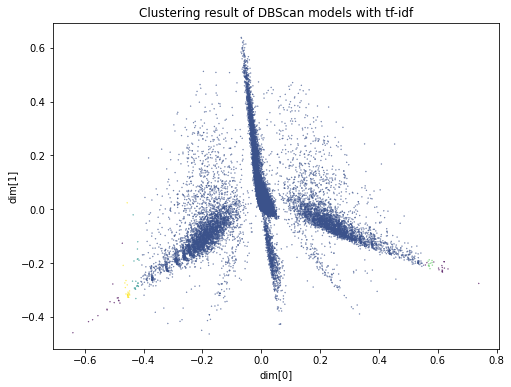

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(dtm_db_3d[:, 1], dtm_db_3d[:, 2], s=0.11, c=db.labels_)
plt.xlabel('dim[0]')
plt.ylabel('dim[1]')
plt.title('Clustering result of DBScan models with tf-idf')
plt.show()

In [23]:
from collections import defaultdict

db_cluster = defaultdict(list)

for i, label in enumerate(db.labels_):
    db_cluster[label].append(dtm_cv_1k[i].toarray())

for k, v in db_cluster.items():
    center = np.mean(v).argsort()[::-1]
    top20 = [cv_1k.get_feature_names()[idx] for idx in center[:20]]
    print('\t', f'Cluster{k}: ', ','.join(top20))

TypeError: only integer scalar arrays can be converted to a scalar index

In [20]:
t = time.time()
hc = AgglomerativeClustering(n_clusters=10, linkage='single')
hc.fit(dtm_cv_1k.toarray())
print(f'Fitted hierarchical clustering with tf-idf, time elapsed: {time.time() - t:.2f}s.')

Fitted hierarchical clustering with tf-idf, time elapsed: 416.04s.


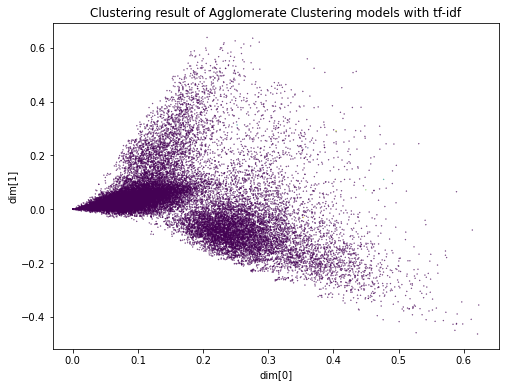

In [21]:
d3 = decomp.transform(dtm_cv_1k.toarray())
plt.figure(figsize=(8,6))
plt.scatter(d3[:, 0], d3[:, 2], s=0.11, c=hc.labels_)
plt.xlabel('dim[0]')
plt.ylabel('dim[1]')
plt.title('Clustering result of Agglomerate Clustering models with tf-idf')
plt.show()